# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name_: Mark Joseph Luminarias \
_Student No._: 2019-08483 \
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: MARK JOSEPH LUMINARIAS**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

### Answer:

In [64]:
#Trapezoidal Rule
import numpy as np

def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5
a = 0.0
b = 5.0

#define integration
def integ_trap(N,a,b):
    h = (b-a)/N
    
    s = (f(a)+f(b))/2
    for k in range (1,N):
        s += f(a+k*h)
    s = s*h
    return (s)

N_arr = np.array([10, 100, 1000])
s_arr = np.zeros(len(N_arr))

#For Error, where g is the derivative of f wrt x
def g(x):
    return 8*x**3 + 6*x + 4
h_arr = np.array((b-a)/N_arr)
err = ((h_arr**2)*(g(a)-g(b))/12)
err_arr = np.array(err)

for k in np.arange(len(N_arr)):
    s_arr[k] = integ_trap(N_arr[k],a,b)
       
    print("For Trapezoid Rule with slices of N =",N_arr[k],", the answer is",s_arr[k], "with an error of" ,err_arr[k],".")

For Trapezoid Rule with slices of N = 10 , the answer is 1471.4375 with an error of -21.458333333333332 .
For Trapezoid Rule with slices of N = 100 , the answer is 1450.2145812500003 with an error of -0.21458333333333338 .
For Trapezoid Rule with slices of N = 1000 , the answer is 1450.0021458331234 with an error of -0.0021458333333333334 .


In [68]:
#For Simpson's Rule
import numpy as np

def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5
a = 0.0
b = 5.0

def integ_simp(N,a,b):
    h = (b-a)/N
    
    s = f(a) + f(b)
    for k in range (1,N,2): #for odd values of k
        s += 4*f(a+k*h)
    for k in range (2,N,2): #for even values of k
        s += 2*f(a+k*h)
    s = (s*h)/3
    return(s)

N_arr = np.array([10,100,1000])
s_arr = np.zeros(len(N_arr))

#For Error, where g is the derivative of f wrt x
def g(x):
    return 48*x
h_arr = np.array((b-a)/N_arr)
err = ((h_arr**4)*(g(a)-g(b))/180)
err_arr = np.array(err)

for k in np.arange(len(N_arr)):
    s_arr[k] = integ_simp(N_arr[k], a, b)
        
    print("For Simpson's rule with slices of N =",N_arr[k],",","the answer is", s_arr[k],"with an error of",err_arr[k],".")

For Simpson's rule with slices of N = 10 , the answer is 1450.0833333333333 with an error of -0.08333333333333333 .
For Simpson's rule with slices of N = 100 , the answer is 1450.0000083333337 with an error of -8.333333333333335e-06 .
For Simpson's rule with slices of N = 1000 , the answer is 1450.000000000834 with an error of -8.333333333333332e-10 .


#### Simpson's rule shows a closer approximation compared to trapezoidal rule. As N gets multiplied by 10 the answer gets closer and closer to a higher degree.

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [2]:
#First we wefine gausswx
from numpy import ones, copy, cos, tan, pi, linspace

def gaussxw(N):
    #Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))
    
    #For finding the roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
    
    #Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [40]:
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5
a = 0.0
b = 5.0
N = 3

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

### Answer:
For $V(x) = x^4, V(a) = a^4$ and $m=1$ the period $T$ is expressed as 
$$ T = \sqrt{8} \int_0^a \dfrac{dx}{\sqrt{a^4 - x^4}}.$$

In [9]:
from numpy import sqrt

def f(a,x):
    return sqrt(8/(a**4-x**4))
N = 20
a = float(input("Enter the amplitude and upper integral limit, a: "))
b = float(input("Enter the lower integral limit, b: "))

x,w = gaussxw(N)
xp = 0.5*(a-b)*x + 0.5*(a+b)
wp = 0.5*(a-b)*w

s = 0.0
for k in range(N):
    s += wp[k]*f(a,xp[k])

print(s)

Enter the amplitude and upper integral limit, a: 1
Enter the lower integral limit, b: 0
3.648094084043215


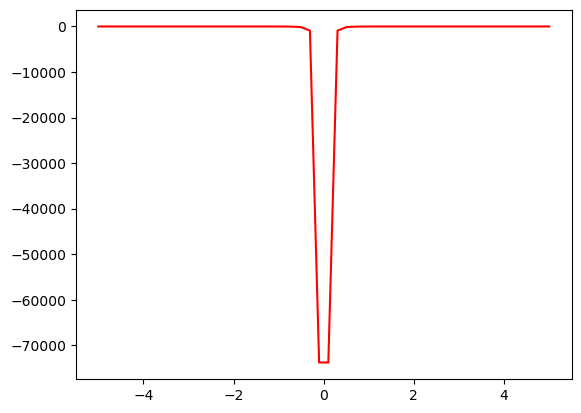

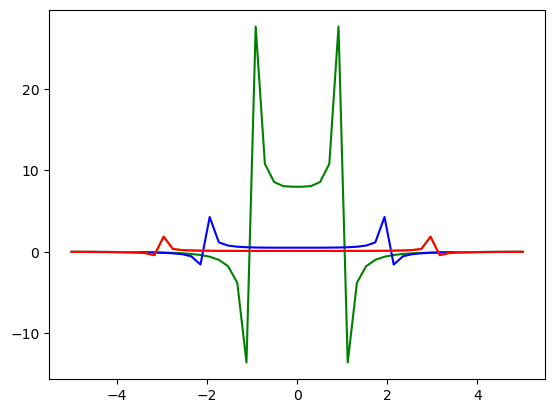

In [10]:
import numpy as np
from numpy import sqrt
from matplotlib import pyplot as plt

def f(a,x):
    return (8/(a**4-x**4))
x = np.linspace(-5,5)

plt.plot(x,f(0,x), 'r')
plt.show()

plt.plot(x,f(1,x), 'g')
plt.plot(x,f(2,x), 'b')
plt.plot(x,f(3,x), 'y')
plt.plot(x,f(3,x), 'r')
plt.show()


plt.show()
